In [1]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.2.1-arm64-arm-64bit
Tensor Flow Version: 2.12.0
Keras Version: 2.12.0

Python 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
Pandas 2.0.0
Scikit-Learn 1.2.2
GPU is available


In [2]:
# IMPORTING STATEMENTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mutual_information_regression as mri
import helper_functions_fs as hf

np.random.seed(7)

In [3]:
from sklearn.preprocessing import StandardScaler

# Import the Data

In [4]:
# training data
data = pd.read_csv('train.csv', index_col=0)
data.head()

InterestRate  MinorityRatio  CensusTractMedFamIncome  MonthlyIncome   
170846         3.750          5.631                    96500           4693  \
154335         4.375          5.745                    93258           3194   
145818         2.750         21.300                    82260           6344   
94035          3.375          4.000                    71172           9776   
175348         4.250          8.000                    65755           3800   

        HUDMedIncome   LTV  PaymentCount  Age1  Age2  HousingExpense  ...   
170846         69400  72.0           360    65    61           21.76  ...  \
154335         94200  79.0           360    34     0           30.74  ...   
145818         81700  99.0           360    32    56           27.87  ...   
94035          76700  80.0           360    25    25            9.00  ...   
175348         73100  80.0           360    30     0           12.00  ...   

        State_31  State_39  State_42  State_48  State_55   
170846       0.0       0.0       0.0       0.0       1.0  \
154335       0.0       0.0       0.0       0.0       1.0   
145818       0.0       0.0       0.0       0.0       0.0   
94035        0.0       1.0       0.0       0.0       0.0   
175348       0.0       1.0       0.0       0.0       0.0   

        State_infrequent_sklearn  Minority_Min  Minority_Missing   
170846                       0.0           0.0               0.0  \
154335                       0.0           0.0               0.0   
145818                       0.0           0.0               0.0   
94035                        0.0           0.0               0.0   
175348                       0.0           0.0               0.0   

        Minority_White  Borrower2Dummy  
170846             1.0               1  
154335             1.0               0  
145818             1.0               1  
94035              1.0               1  
175348             1.0               0  

[5 rows x 74 columns]

In [5]:
data.shape

(189079, 74)

In [6]:
# defining response variable and input features
y = data.pop('InterestRate')
X = data.copy()

In [7]:
# test data
data_test = pd.read_csv('test.csv', index_col=0)
data_test.head()

InterestRate  MinorityRatio  CensusTractMedFamIncome  MonthlyIncome   
188315         4.000         47.950                    80357          18334  \
104813         3.250          6.489                   112882          10065   
164647         3.475          9.661                   118045          19272   
110948         3.125          5.172                   100096           5171   
152548         4.750          4.396                    91638          14262   

        HUDMedIncome   LTV  PaymentCount  Age1  Age2  HousingExpense  ...   
188315         95900  80.0           360    39     0           17.07  ...  \
104813         86200  72.0           360    64    66           20.14  ...   
164647         82300  72.0           360    62    62           14.70  ...   
110948         89200  80.0           180    43     0           25.31  ...   
152548         79600  80.0           360    39    31           12.66  ...   

        State_31  State_39  State_42  State_48  State_55   
188315       0.0       0.0       0.0       1.0       0.0  \
104813       0.0       0.0       0.0       0.0       0.0   
164647       0.0       0.0       0.0       0.0       1.0   
110948       0.0       0.0       0.0       0.0       0.0   
152548       0.0       0.0       0.0       0.0       0.0   

        State_infrequent_sklearn  Minority_Min  Minority_Missing   
188315                       0.0           0.0               0.0  \
104813                       1.0           0.0               0.0   
164647                       0.0           0.0               1.0   
110948                       0.0           0.0               0.0   
152548                       0.0           0.0               0.0   

        Minority_White  Borrower2Dummy  
188315             1.0               0  
104813             1.0               1  
164647             0.0               1  
110948             1.0               0  
152548             1.0               1  

[5 rows x 74 columns]

In [8]:
y_test = data_test.pop('InterestRate')
X_test = data_test.copy()

# Scaling

In [9]:
# input variables
ss = StandardScaler()
X_train = ss.fit_transform(X)
X_test = ss.transform(X_test)
X = pd.DataFrame(X_train, columns=data.columns)
X_test = pd.DataFrame(X_test, columns=data.columns)
X.describe()

MinorityRatio  CensusTractMedFamIncome  MonthlyIncome  HUDMedIncome   
count   1.890790e+05             1.890790e+05   1.890790e+05  1.890790e+05  \
mean   -2.335544e-16             4.329118e-17   6.898592e-17 -1.819958e-16   
std     1.000003e+00             1.000003e+00   1.000003e+00  1.000003e+00   
min    -9.829129e-01            -2.968603e+00  -1.541693e+00 -3.136269e+00   
25%    -6.899229e-01            -6.907823e-01  -6.998868e-01 -6.839963e-01   
50%    -3.806037e-01            -2.074440e-01  -2.267679e-01 -6.296614e-02   
75%     2.836096e-01             5.193869e-01   4.021168e-01  5.102925e-01   
max     3.195775e+00             4.143399e+00   3.701777e+00  3.949844e+00   

                LTV  PaymentCount          Age1          Age2  HousingExpense   
count  1.890790e+05  1.890790e+05  1.890790e+05  1.890790e+05    1.890790e+05  \
mean   6.964825e-16  2.689164e-16 -2.288664e-16  4.235170e-17    1.323913e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00    1.000003e+00   
min   -8.617748e-01 -3.667909e+00 -2.003581e+00 -1.101219e+00   -2.410365e+00   
25%   -8.617748e-01 -2.778056e-01 -8.066413e-01 -1.101219e+00   -7.202951e-01   
50%   -9.168695e-02  5.697203e-01 -1.333627e-01  1.920703e-01   -1.531912e-01   
75%    1.650090e-01  5.697203e-01  6.895334e-01  7.761363e-01    5.862923e-01   
max    5.170580e+00  5.697203e-01  3.981118e+00  2.862086e+00    4.372398e+00   

        DebtExpense  ...      State_31      State_39      State_42   
count  1.890790e+05  ...  1.890790e+05  1.890790e+05  1.890790e+05  \
mean   6.650381e-16  ...  4.911594e-17  6.713514e-17  4.160011e-17   
std    1.000003e+00  ...  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.148844e+00  ... -2.210030e-01 -3.043770e-01 -2.002391e-01   
25%   -7.560665e-01  ... -2.210030e-01 -3.043770e-01 -2.002391e-01   
50%    8.581993e-03  ... -2.210030e-01 -3.043770e-01 -2.002391e-01   
75%    7.836339e-01  ... -2.210030e-01 -3.043770e-01 -2.002391e-01   
max    5.361121e+00  ...  4.524826e+00  3.285399e+00  4.994029e+00   

           State_48      State_55  State_infrequent_sklearn  Minority_Min   
count  1.890790e+05  1.890790e+05              1.890790e+05  1.890790e+05  \
mean  -5.148343e-17  2.324270e-17              3.370849e-17 -4.154375e-17   
std    1.000003e+00  1.000003e+00              1.000003e+00  1.000003e+00   
min   -1.994807e-01 -3.706281e-01             -5.073212e-01 -2.293908e-01   
25%   -1.994807e-01 -3.706281e-01             -5.073212e-01 -2.293908e-01   
50%   -1.994807e-01 -3.706281e-01             -5.073212e-01 -2.293908e-01   
75%   -1.994807e-01 -3.706281e-01             -5.073212e-01 -2.293908e-01   
max    5.013015e+00  2.698123e+00              1.971138e+00  4.359372e+00   

       Minority_Missing  Minority_White  Borrower2Dummy  
count      1.890790e+05    1.890790e+05    1.890790e+05  
mean       2.621145e-17    1.026286e-16    3.848105e-17  
std        1.000003e+00    1.000003e+00    1.000003e+00  
min       -2.695680e-01   -2.737468e+00   -1.210046e+00  
25%       -2.695680e-01    3.653010e-01   -1.210046e+00  
50%       -2.695680e-01    3.653010e-01    8.264146e-01  
75%       -2.695680e-01    3.653010e-01    8.264146e-01  
max        3.709638e+00    3.653010e-01    8.264146e-01  

[8 rows x 73 columns]

In [10]:
# dependent variables
ss_y = StandardScaler()
y = ss_y.fit_transform(np.array(y).reshape(-1, 1))
y_test = ss_y.transform(np.array(y_test).reshape(-1, 1))
pd.Series(y.flatten()).describe()

count    1.890790e+05
mean    -1.981173e-16
std      1.000003e+00
min     -2.684678e+00
25%     -7.623710e-01
50%     -1.856790e-01
75%      5.832437e-01
max      4.427857e+00
dtype: float64

# TODO:  PREPARATION FOR VARIABLE SELECTION APPLICATIONS 

Below is a list of variables we are choosing to keep for the purposes of re-running our models on the selected variables:
- MinorityRatio
- HUDMedIncome 
- PaymentCount
- NoteDate
- FirstTime
- SelfEmployed
- LoanPurpose_1

(see notebook *2_feature_selection.ipynb*)

In [11]:
X_vs = X[['HUDMedIncome', 'PaymentCount', 'NoteDate', 'FirstTime', 'SelfEmployed', 'LoanPurpose_1']]
X_test_vs = X_test[['HUDMedIncome', 'PaymentCount', 'NoteDate', 'FirstTime', 'SelfEmployed', 'LoanPurpose_1']]

# TODO: Scoring Methods

We define a helper function to save the scores for each model and make a final comparison.

The metrics we will analyse are: 
- MSE: Mean Squared Error
- MAE: Mean Absolute Error
- MR: Mean Residual
- **R2 ???????**
- **FAIRNESS QUALCOSA!!! TODO!!**

# PRENDERE DA ONE NOTE !!!!

In [80]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def mean_residual(y_true, prediction):
    '''Compute the mean residual metric'''
    residuals = (y_true - prediction)
    MR = residuals.mean()
    return MR


def compute_scores(x, y_true, y_pred):
    '''Compute the following metrics for the given model: MSE, MAE, MR, r2'''
    y_true = y_true.reshape(y_pred.shape)

    MSE = mean_squared_error(y_true, y_pred)
    print(f"MSE: {MSE:.4f}")
    MAE = mean_absolute_error(y_true, y_pred)
    print(f"MAE: {MAE:.4f}")
    MR = mean_residual(y_true, y_pred)
    print(f"MR: {MR:.4f}")
    R2 = r2_score(y_true, y_pred)
    adj_R2 = 1- ((1-R2) * (x.shape[0]-1)/(x.shape[0]-x.shape[1]-1))
    print(f"adj-R2: {adj_R2:.4f}")
    return [MSE, MAE, MR, adj_R2]



def save_scores(model, scores):
    '''Store scores for the given model into a dedicated dataframe for a final comparison across models'''
    MSE, MAE, MR, r2 = scores
    pd.Series(scores).to_csv('scores/'+model)
    model_names.append(model)
    MSEs.append(MSE)
    MAEs.append(MAE)
    MRs.append(MR)
    r2s.append(r2)
    

def display_scores():
    scores_df = pd.DataFrame([model_names, MSEs, MAEs, MRs, r2s], 
                 index=['method', 'MSE', 'MAE', 'MR', 'adj R-squared']).T
    return scores_df

In [13]:
model_names, MSEs, MAEs, MRs, r2s = [],[],[],[],[]

In [77]:
def export_pred(y_pred_std, model, scaler=ss_y):
    '''Reverts model predictions to the original scale of the input data and then saves it to a csv file'''

    y_pred = scaler.inverse_transform(np.array(y_pred_std, ndmin=2)).flatten()
    np.savetxt('predictions/'+str(model)+'_pred.csv', y_pred, delimiter=",")

# MODELS

# 1. Linear Regression

In [14]:
import statsmodels.api as sm

In [15]:
#add constant to predictor variables
x = sm.add_constant(X)
#fit linear regression model
lr = sm.OLS(y, x).fit()

#view model summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     7660.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:15:50   Log-Likelihood:            -1.5285e+05
No. Observations:              189079   AIC:                         3.058e+05
Df Residuals:                  189019   BIC:                         3.064e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [16]:
X_TEST = sm.add_constant(X_test)
lr_pred = lr.predict(X_TEST)
scores = compute_scores(X_TEST, y_test, lr_pred)
save_scores('LinearRegression', scores)

MSE: 0.2967
MAE: 0.4255
MR: 0.0002
adj-R2: 0.7078


### Linear Regression with selected features

In [17]:
#add constant to predictor variables
x = sm.add_constant(X_vs)
#fit linear regression model
lr_vs = sm.OLS(y, x).fit()

#view model summary
print(lr_vs.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                 6.516e+04
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:15:50   Log-Likelihood:            -1.6232e+05
No. Observations:              189079   AIC:                         3.247e+05
Df Residuals:                  189072   BIC:                         3.247e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.126e-14      0.001   8.58e-12

In [18]:
X_TEST_vs = sm.add_constant(X_test_vs)
scores = compute_scores(X_TEST_vs, y_test, lr_vs)
save_scores('LinearRegression_VS', scores)

MSE: 0.3287
MAE: 0.4457
MR: 0.0005
adj-R2: 0.6763


# 4. Regression Tree


In [19]:
from sklearn.tree import DecisionTreeRegressor

## GRIDSEARCH CV

In [20]:
from sklearn.model_selection import GridSearchCV

tree = GridSearchCV(
    DecisionTreeRegressor(max_depth=2),
    param_grid={"max_depth": range(3,22,3)}, 
    scoring= 'neg_mean_squared_error', 
    verbose=3)

In [21]:
tree.fit(X, y)

print(f"\nBest Tree with params: {tree.best_params_} and MSE: {tree.best_score_:.3f}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ......................max_depth=3;, score=-0.311 total time=   0.4s
[CV 2/5] END ......................max_depth=3;, score=-0.313 total time=   0.4s
[CV 3/5] END ......................max_depth=3;, score=-0.311 total time=   0.3s
[CV 4/5] END ......................max_depth=3;, score=-0.306 total time=   0.3s
[CV 5/5] END ......................max_depth=3;, score=-0.313 total time=   0.3s
[CV 1/5] END ......................max_depth=6;, score=-0.257 total time=   0.7s
[CV 2/5] END ......................max_depth=6;, score=-0.256 total time=   0.7s
[CV 3/5] END ......................max_depth=6;, score=-0.254 total time=   0.7s
[CV 4/5] END ......................max_depth=6;, score=-0.255 total time=   0.7s
[CV 5/5] END ......................max_depth=6;, score=-0.256 total time=   0.7s
[CV 1/5] END ......................max_depth=9;, score=-0.233 total time=   1.0s
[CV 2/5] END ......................max_depth=9;, 

The optimal tree must have a depth around 12. Therefore, we perform a second cross validation around this number.

In [22]:
tree = GridSearchCV(
    DecisionTreeRegressor(max_depth=2),
    param_grid={"max_depth": range(10,15,1)},
    scoring= 'neg_mean_squared_error', 
    verbose=3)

tree.fit(X, y)
print(f"\nBest Tree with params: {tree.best_params_} and MSE: {tree.best_score_:.3f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....................max_depth=10;, score=-0.229 total time=   1.2s
[CV 2/5] END .....................max_depth=10;, score=-0.228 total time=   1.2s
[CV 3/5] END .....................max_depth=10;, score=-0.226 total time=   1.2s
[CV 4/5] END .....................max_depth=10;, score=-0.227 total time=   1.1s
[CV 5/5] END .....................max_depth=10;, score=-0.227 total time=   1.2s
[CV 1/5] END .....................max_depth=11;, score=-0.228 total time=   1.3s
[CV 2/5] END .....................max_depth=11;, score=-0.227 total time=   1.3s
[CV 3/5] END .....................max_depth=11;, score=-0.223 total time=   1.3s
[CV 4/5] END .....................max_depth=11;, score=-0.226 total time=   1.3s
[CV 5/5] END .....................max_depth=11;, score=-0.225 total time=   1.3s
[CV 1/5] END .....................max_depth=12;, score=-0.227 total time=   1.4s
[CV 2/5] END .....................max_depth=12;, 

In [23]:
# Creating regression model with selected number of splits
best_tree = DecisionTreeRegressor(max_depth=tree.best_params_['max_depth'])
best_tree.fit(X, y)

DecisionTreeRegressor(max_depth=11)

In [24]:
scores = compute_scores(X_test, y_test, best_tree)
save_scores('Regression_Tree', scores)

MSE: 0.2248
MAE: 0.3613
MR: 0.0007
adj-R2: 0.7787


# 5. Random Forest


In [25]:
from sklearn.ensemble import RandomForestRegressor

## GRIDSEARCH CV

https://www.researchgate.net/publication/230766603_How_Many_Trees_in_a_Random_Forest citare !! per numero di trees:

"The analysis of 29 datasets shows that from128 trees there is no more signiﬁcant diﬀerence between the forests using 256, 512,1024, 2048 and 4096 trees. The mean and the median AUC values do not presentmajor changes from 64 trees. Therefore, it is possible to suggest, based on the ex-periments, a range between 64 and 128 trees in a forest"

In [26]:
forest = GridSearchCV(
    RandomForestRegressor(random_state=0),
    param_grid = {'n_estimators': [2,4, 8, 16, 32, 64, 96, 128], 'max_depth': range(5,45,5)},
    scoring= 'neg_mean_squared_error',
    verbose=2)

In [27]:
yf= y.flatten()
forest.fit(X,yf)

print(f"\nBest RandomForest with params: {forest.best_params_} and MSE: {forest.best_score_:.3f}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ........................max_depth=5, n_estimators=2; total time=   0.8s
[CV] END ........................max_depth=5, n_estimators=2; total time=   0.8s
[CV] END ........................max_depth=5, n_estimators=2; total time=   0.8s
[CV] END ........................max_depth=5, n_estimators=2; total time=   0.8s
[CV] END ........................max_depth=5, n_estimators=2; total time=   0.8s
[CV] END ........................max_depth=5, n_estimators=4; total time=   1.5s
[CV] END ........................max_depth=5, n_estimators=4; total time=   1.5s
[CV] END ........................max_depth=5, n_estimators=4; total time=   1.5s
[CV] END ........................max_depth=5, n_estimators=4; total time=   1.5s
[CV] END ........................max_depth=5, n_estimators=4; total time=   1.5s
[CV] END ........................max_depth=5, n_estimators=8; total time=   3.0s
[CV] END ........................max_depth=5, n

[CV] END ......................max_depth=15, n_estimators=32; total time=  33.9s
[CV] END ......................max_depth=15, n_estimators=32; total time=  33.9s
[CV] END ......................max_depth=15, n_estimators=32; total time=  33.9s
[CV] END ......................max_depth=15, n_estimators=32; total time=  33.9s
[CV] END ......................max_depth=15, n_estimators=64; total time= 1.1min
[CV] END ......................max_depth=15, n_estimators=64; total time= 1.1min
[CV] END ......................max_depth=15, n_estimators=64; total time= 1.1min
[CV] END ......................max_depth=15, n_estimators=64; total time= 1.1min
[CV] END ......................max_depth=15, n_estimators=64; total time= 1.1min
[CV] END ......................max_depth=15, n_estimators=96; total time= 1.7min
[CV] END ......................max_depth=15, n_estimators=96; total time= 1.7min
[CV] END ......................max_depth=15, n_estimators=96; total time= 1.7min
[CV] END ...................

[CV] END .......................max_depth=30, n_estimators=2; total time=   3.1s
[CV] END .......................max_depth=30, n_estimators=2; total time=   3.1s
[CV] END .......................max_depth=30, n_estimators=4; total time=   6.3s
[CV] END .......................max_depth=30, n_estimators=4; total time=   6.3s
[CV] END .......................max_depth=30, n_estimators=4; total time=   6.3s
[CV] END .......................max_depth=30, n_estimators=4; total time=   6.3s
[CV] END .......................max_depth=30, n_estimators=4; total time=   6.2s
[CV] END .......................max_depth=30, n_estimators=8; total time=  12.5s
[CV] END .......................max_depth=30, n_estimators=8; total time=  12.5s
[CV] END .......................max_depth=30, n_estimators=8; total time=  12.5s
[CV] END .......................max_depth=30, n_estimators=8; total time=  12.5s
[CV] END .......................max_depth=30, n_estimators=8; total time=  12.5s
[CV] END ...................

[CV] END ......................max_depth=40, n_estimators=64; total time= 1.7min
[CV] END ......................max_depth=40, n_estimators=64; total time= 1.7min
[CV] END ......................max_depth=40, n_estimators=64; total time= 1.7min
[CV] END ......................max_depth=40, n_estimators=64; total time= 1.7min
[CV] END ......................max_depth=40, n_estimators=64; total time= 1.7min
[CV] END ......................max_depth=40, n_estimators=96; total time= 2.6min
[CV] END ......................max_depth=40, n_estimators=96; total time= 2.6min
[CV] END ......................max_depth=40, n_estimators=96; total time= 2.6min
[CV] END ......................max_depth=40, n_estimators=96; total time= 2.6min
[CV] END ......................max_depth=40, n_estimators=96; total time= 2.6min
[CV] END .....................max_depth=40, n_estimators=128; total time= 3.4min
[CV] END .....................max_depth=40, n_estimators=128; total time= 3.4min
[CV] END ...................

In [28]:
# Creating a random forest model with the selected parameters
best_forest = RandomForestRegressor(max_depth=forest.best_params_['max_depth'], 
                                    n_estimators=forest.best_params_['n_estimators'])
best_forest.fit(X, yf)

RandomForestRegressor(max_depth=30, n_estimators=128)

In [81]:
forest_pred = best_forest.predict(X_test)
scores = compute_scores(X_test, y_test, forest_pred)

save_scores('best_forest', scores)

MSE: 0.1838
MAE: 0.3262
MR: -0.0023
adj-R2: 0.8188


In [83]:
export_pred(forest_pred, 'best_forest')

In [30]:
#result = {"model": 'RandomForest', "cv_results": pd.DataFrame(forest.cv_results_)}
#results.append(result)

In [31]:
def compare_forests(cv_results, model_name='RandomForest'):
    import matplotlib.pyplot as plt
    import numpy as np

    fig, axs = plt.subplots(1, 1, figsize=(6,5))
    fig.suptitle("Complexity - Performance: number of estimators vs score")

    # Plot: number of estimators vs score
    ax = axs
    colors_list2 = plt.cm.Paired(np.arange(len(cv_results['param_max_depth'].unique())))
    for i,num in enumerate(cv_results['param_max_depth'].unique()):
        ax.plot(
            cv_results[  cv_results['param_max_depth']==num   ]['param_n_estimators'],#["param_max_depth"],
            cv_results[  cv_results['param_max_depth']==num   ]["mean_test_score"],
            marker="o",
            color=colors_list2[i],
            label=str(num),
        )
    ax.set_xlabel("Number of Trees")
    ax.set_ylabel("MSE score")

    # Add legend
    axs.legend(loc="lower right", title='Depth of trees')

    plt.tight_layout()
    plt.show()

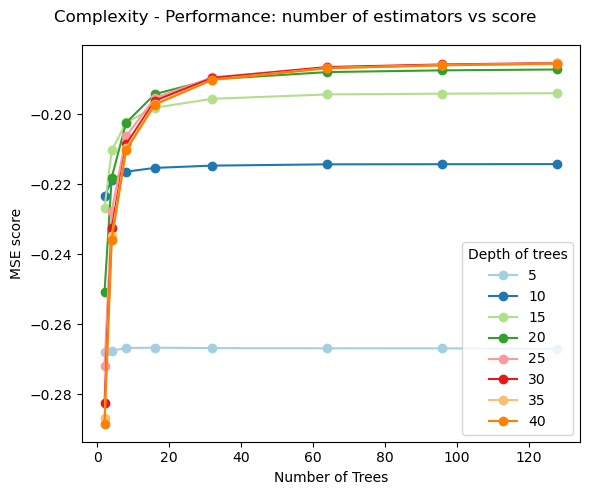

In [33]:
compare_forests(pd.DataFrame(forest.cv_results_) ) # results[-1]['cv_results'] )#

# 6. XGBoost 

First we explore the default parameters, then move on to cross validation.

In [38]:
from xgboost import XGBRegressor
import time

In [39]:
xgbr = XGBRegressor(tree_method="hist")
start = time.time()
xgbr.fit(X, yf)
elapsed = time.time() - start
print(f'XGB Training ran in {elapsed:.5f} seconds')

XGB Training ran in 0.86508 seconds


In [40]:
scores = compute_scores(X_test, y_test, xgbr)
save_scores('XGBoost', scores)

MSE: 0.1780
MAE: 0.3235
MR: -0.0001
adj-R2: 0.8247


## Cross Validation

In [71]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [16, 64, 128],
    'learning_rate': [0.01, 0.1, 0.2, 0.3], # def 0.3
    'max_depth': [3, 4, 6],                 # def 0.6
    'min_child_weight': [1, 2, 3],          # def 1
    'gamma': [0, 0.1, 0.2],     # def 0, minimum loss reduction required for further tree splits
    'reg_alpha': [0, 0.5],      # def 0, L1 regularization to the feature weights
    'reg_lambda': [0.5, 1],     # def 1, L2 regularization to the feature weights
    'subsample': [0.8, 1.0],    # def 1
    'colsample_bytree': [0.8, 1.0]} # def 1

In [72]:
xgbr = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=2)


In [73]:
xgbr.fit(X, yf)

print(f"\nBest XGBRegressor with params: {xgbr.best_params_} and MSE: {xgbr.best_score_:.3f}")

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_a

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=12

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, r

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_a

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, r

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_l

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128,

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=12

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0,

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, r

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_l

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lam

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lam

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lam

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lam

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  11.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=12

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alph

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=12

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   7.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   9.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   9.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, r

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_l

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  11.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  11.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  11.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=12

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_a

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0,

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  11.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_l

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  11.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   9.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0

In [75]:
# Creating a XGB model with the selected parameters
best_xgbr = XGBRegressor(max_depth=xgbr.best_params_['max_depth'],
                        n_estimators=xgbr.best_params_['n_estimators'],
                        learning_rate=xgbr.best_params_['learning_rate'],
                        min_child_weight=xgbr.best_params_['min_child_weight'], 
                        gamma=xgbr.best_params_['gamma'],
                        alpha=xgbr.best_params_['reg_alpha'],
                        reg_lambda=xgbr.best_params_['reg_lambda'],
                        subsample=xgbr.best_params_['subsample'],
                        colsample_bytree=xgbr.best_params_['colsample_bytree']
                        )
best_xgbr.fit(X, yf)

XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=128, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [84]:
xgb_pred = best_xgbr.predict(X_test)
scores = compute_scores(X_test, y_test, xgb_pred)

save_scores('best_xgb', scores)

MSE: 0.1747
MAE: 0.3207
MR: -0.0001
adj-R2: 0.8278


In [85]:
export_pred(xgb_pred, 'best_xgb')

# 7. Light GBM

In [86]:
from lightgbm import LGBMRegressor

In [87]:
lgbm = LGBMRegressor()
start = time.time()
lgbm.fit(X, yf)
elapsed = time.time() - start
print(f'LGBM Training ran in {elapsed:.5f} seconds')

LGBM Training ran in 1.29886 seconds


In [90]:
lgbm_pred = lgbm.predict(X_test)
scores = compute_scores(X_test, y_test, lgbm_pred)
save_scores('LightGBM', scores)

MSE: 0.1957
MAE: 0.3402
MR: 0.0064
adj-R2: 0.8070


## Cross Validation

In [97]:
# Define the parameter grid to search
param_grid = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  
    'max_depth': [3, 4, 6],                  
    'min_child_weight': [1, 2, 3], 
    'num_leaves': [8, 16, 32, 64],
    'n_estimators': [16, 64, 128],
    'reg_alpha': [0, 0.5],                   # L1 regularization
    'reg_lambda': [0.5, 1],                  # L2 regularization
}

In [98]:
lgbm = GridSearchCV(estimator=LGBMRegressor(), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=2)

In [99]:
lgbm.fit(X, yf)

print(f"\nBest LGBMRegressor with params: {lgbm.best_params_} and MSE: {lgbm.best_score_:.3f}")

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[C

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsampl

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.3s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_by

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_by

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_by

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, l

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] E

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[C

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] E

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] E

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, l

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.3s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   2.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   2.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   2.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   2.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   2.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END cols

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learn

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learn

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learn

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learn

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learn

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learn

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learn

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.3s
[CV] END colsample_b

Best LGBMRegressor with params: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 128, 'num_leaves': 64, 'reg_alpha': 0.5, 'reg_lambda': 1} and MSE: -0.176


In [100]:
# Creating a XGB model with the selected parameters
best_lgbm = LGBMRegressor(max_depth=lgbm.best_params_['max_depth'],
                        n_estimators=lgbm.best_params_['n_estimators'],
                        learning_rate=lgbm.best_params_['learning_rate'],
                        min_child_weight=lgbm.best_params_['min_child_weight'], 

                        reg_alpha=lgbm.best_params_['reg_alpha'],
                        reg_lambda=lgbm.best_params_['reg_lambda'],

                        colsample_bytree=lgbm.best_params_['colsample_bytree'],
                        num_leaves=lgbm.best_params_['num_leaves'],
                        )
best_lgbm.fit(X, yf)

LGBMRegressor(learning_rate=0.3, max_depth=6, min_child_weight=1,
              n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1)

In [102]:
lgbm_pred = best_lgbm.predict(X_test)
scores = compute_scores(X_test, y_test, lgbm_pred)

save_scores('best_lgbm', scores)

MSE: 0.1766
MAE: 0.3220
MR: 0.0069
adj-R2: 0.8259


In [103]:
export_pred(lgbm_pred, 'best_lgbm')


# STACKING


In [105]:
#!pip install vecstack

  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19865 sha256=20d7703fe94ec7abf6cc9674e8f1c35a05013fc5fa6bd1ccd3e7154547fee578
  Stored in directory: /Users/fra/Library/Caches/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


In [118]:
from vecstack import StackingTransformer

# Initialize 1st level estimators
estimators = [('RF', RandomForestRegressor()),
              ('LGBM', LGBMRegressor())]
              
# Initialize StackingTransformer
stack = StackingTransformer(estimators, regression=True, verbose=2, shuffle=True, metric=mean_squared_error)

In [119]:
# Fit
stack = stack.fit(X, yf)

task:         [regression]
metric:       [mean_squared_error]
variant:      [A]
n_estimators: [2]

estimator  0: [RF: RandomForestRegressor]
    fold  0:  [0.18684237]
    fold  1:  [0.18512877]
    fold  2:  [0.18881311]
    fold  3:  [0.18870911]
    ----
    MEAN:     [0.18737334] + [0.00151470]

estimator  1: [LGBM: LGBMRegressor]
    fold  0:  [0.19475186]
    fold  1:  [0.19437336]
    fold  2:  [0.19577487]
    fold  3:  [0.19543056]
    ----
    MEAN:     [0.19508266] + [0.00055062]



In [120]:
# Get stacked features
S_train = stack.transform(X_train)
S_test = stack.transform(X_test)

Train set was detected.
Transforming...

estimator  0: [RF: RandomForestRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [LGBM: LGBMRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

Transforming...

estimator  0: [RF: RandomForestRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [LGBM: LGBMRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE



In [121]:
xgbr = XGBRegressor()
start = time.time()
xgbr.fit(S_train, yf)
elapsed = time.time() - start
print(f'XGB Stacking Training ran in {elapsed:.5f} seconds')

XGB Stacking Training ran in 2.62661 seconds


In [122]:
stacking_pred = xgbr.predict(S_test)
scores = compute_scores(S_test, y_test, stacking_pred)

save_scores('stacking', scores)

MSE: 0.1828
MAE: 0.3263
MR: 0.0000
adj-R2: 0.8201


# trying with crossvalidated parameters

In [123]:
forest.best_params_

{'max_depth': 30, 'n_estimators': 128}

In [124]:
lgbm.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 128,
 'num_leaves': 64,
 'reg_alpha': 0.5,
 'reg_lambda': 1}

In [125]:
from vecstack import StackingTransformer

# Initialize 1st level estimators
estimators = [('RF', RandomForestRegressor(max_depth=forest.best_params_['max_depth'], 
                                    n_estimators=forest.best_params_['n_estimators'])),
              ('LGBM', LGBMRegressor(max_depth=lgbm.best_params_['max_depth'],
                        n_estimators=lgbm.best_params_['n_estimators'],
                        learning_rate=lgbm.best_params_['learning_rate'],
                        min_child_weight=lgbm.best_params_['min_child_weight'], 
                        reg_alpha=lgbm.best_params_['reg_alpha'],
                        reg_lambda=lgbm.best_params_['reg_lambda'],
                        colsample_bytree=lgbm.best_params_['colsample_bytree'],
                        num_leaves=lgbm.best_params_['num_leaves'],
              ))]
              
# Initialize StackingTransformer
stack = StackingTransformer(estimators, regression=True, verbose=2, shuffle=True, metric=mean_squared_error)

In [126]:
# Fit
stack = stack.fit(X, yf)

task:         [regression]
metric:       [mean_squared_error]
variant:      [A]
n_estimators: [2]

estimator  0: [RF: RandomForestRegressor]
    fold  0:  [0.18629220]
    fold  1:  [0.18460974]
    fold  2:  [0.18802183]
    fold  3:  [0.18761874]
    ----
    MEAN:     [0.18663563] + [0.00133325]

estimator  1: [LGBM: LGBMRegressor]
    fold  0:  [0.17604921]
    fold  1:  [0.17687985]
    fold  2:  [0.17925742]
    fold  3:  [0.17606401]
    ----
    MEAN:     [0.17706262] + [0.00131099]



In [127]:
# Get stacked features
S_train = stack.transform(X_train)
S_test = stack.transform(X_test)

Train set was detected.
Transforming...

estimator  0: [RF: RandomForestRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [LGBM: LGBMRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

Transforming...

estimator  0: [RF: RandomForestRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [LGBM: LGBMRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE



In [128]:
xgbr = XGBRegressor()
start = time.time()
xgbr.fit(S_train, yf)
elapsed = time.time() - start
print(f'XGB Stacking Training ran in {elapsed:.5f} seconds')

XGB Stacking Training ran in 2.57107 seconds


In [129]:
stacking_pred = xgbr.predict(S_test)
scores = compute_scores(S_test, y_test, stacking_pred)

save_scores('stacking', scores)

MSE: 0.1717
MAE: 0.3165
MR: 0.0003
adj-R2: 0.8310


In [130]:
export_pred(stacking_pred, 'Stacking')

# analisi finali
- predictions per anno vs reale (grafica)

In [133]:
final_scores = display_scores()
final_scores

method       MSE       MAE        MR adj R-squared
0      LinearRegression  0.296722  0.425457  0.000245      0.707827
1   LinearRegression_VS   0.32875  0.445652  0.000465       0.67629
2       Regression_Tree   0.22478  0.361341  0.000702      0.778666
3           best_forest  0.183782  0.326238 -0.002291      0.819036
4               XGBoost  0.178023  0.323517 -0.000149      0.824707
5             best_xgbr  0.177764  0.323059   0.00029      0.824962
6             best_xgbr  0.174681  0.320707 -0.000058      0.827997
7           best_forest  0.183782  0.326238 -0.002291      0.818826
8              best_xgb  0.174681  0.320707 -0.000058      0.827797
9              LightGBM  0.195743  0.340226  0.006355      0.807034
10            best_lgbm  0.176601   0.32202   0.00687      0.825904
11             stacking  0.182775  0.326346  0.000004      0.820089
12             stacking  0.171671  0.316466  0.000275      0.831019

In [134]:
final_scores.to_csv('final_scores.csv')